In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, plot_roc_curve

In [2]:
train = pd.read_csv("training_data(no_pre-diabetes).csv")
test = pd.read_csv("testing_data(no_pre-diabetes).csv")

In [3]:
train.loc[train['Diabetes_012'] == 2, "Diabetes_012"] = 1
test.loc[test['Diabetes_012'] == 2, "Diabetes_012"] = 1

In [4]:
train_X = train.iloc[:, 1:].values
train_y = train.iloc[:, 0].values
test_X = test.iloc[:, 1:].values
test_y = test.iloc[:, 0].values

In [5]:
clf = LogisticRegression().fit(train_X, train_y)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
pred_y = clf.predict(test_X)

In [7]:
confusion_matrix(test_y, pred_y)

array([[68937,  1585],
       [ 9814,  1851]])

Accuracy

In [8]:
accuracy_score(test_y, pred_y)

0.8613040991884361

In [9]:
(68937+1851)/(68937+1585+9814+1851)

0.8613040991884361

Recall

In [10]:
recall_score(test_y, pred_y)

0.15867981140162882

In [11]:
1851/(1851+9814)

0.15867981140162882

Specificity

In [12]:
68937 / (68937 + 1585)

0.9775247440515017

Precision

In [13]:
precision_score(test_y, pred_y)

0.5387077997671711

In [14]:
(1851)/(1851+1585)

0.5387077997671711

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


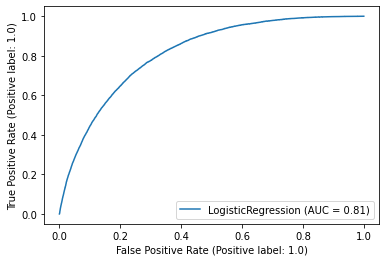

In [15]:
plot_roc_curve(clf, test_X, test_y)